In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
from tqdm import tqdm
%matplotlib inline

In [2]:
path_daisy = 'daisy/'
path_dandelion = 'dandelion/'
path_rose = 'rose/'
path_sunflower = 'sunflower/'
path_tulip = 'tulip/'

In [3]:
daisy = os.listdir(path_daisy)
dandelion = os.listdir(path_dandelion)
rose = os.listdir(path_rose)
sunflower = os.listdir(path_sunflower)
tulip = os.listdir(path_tulip)

In [4]:
print('No. of samples:\ndaisy =\t',len(daisy),'\ndandelion =\t',len(dandelion),'\nrose =\t',len(rose),'\nsunflower =\t',len(sunflower),'\ntulip =\t',len(tulip))

No. of samples:
daisy =	 769 
dandelion =	 1052 
rose =	 784 
sunflower =	 734 
tulip =	 984


In [42]:
pixel = 35

In [43]:
def resizer(pic):
    pic = cv2.resize(pic,(pixel,pixel))
    pic = pic.reshape(1,pic.shape[0]*pic.shape[1]*pic.shape[2])
    pic = pic/255
    return pic

In [44]:
img_daisy = np.zeros((len(daisy),pixel*pixel*3+1))
img_dandelion = np.zeros((len(dandelion),pixel*pixel*3+1))
img_rose = np.zeros((len(rose),pixel*pixel*3+1))
img_sunflower = np.zeros((len(sunflower),pixel*pixel*3+1))
img_tulip = np.zeros((len(tulip),pixel*pixel*3+1))

In [45]:
i = 0
for i in tqdm(range(len(daisy))):
    pic = cv2.imread(path_daisy+daisy[i])
    pic = resizer(pic)
    img_daisy[i,:(pixel*pixel*3)] = pic
    img_daisy[i,-1] = 0

100%|██████████| 769/769 [00:01<00:00, 704.70it/s]


In [46]:
i = 0
for i in tqdm(range(len(dandelion))):
    if i!=240 and i!=494 and i!=758:
        pic = cv2.imread(path_dandelion+dandelion[i])
        pic = resizer(pic)
        img_dandelion[i,:(pixel*pixel*3)] = pic
        img_dandelion[i,-1] = 1

100%|██████████| 1052/1052 [00:01<00:00, 675.79it/s]


In [47]:
i = 0
for i in tqdm(range(len(rose))):
    pic = cv2.imread(path_rose+rose[i])
    pic = resizer(pic)
    img_rose[i,:(pixel*pixel*3)] = pic
    img_rose[i,-1] = 2

100%|██████████| 784/784 [00:01<00:00, 702.69it/s]


In [48]:
i = 0
for i in tqdm(range(len(sunflower))):
    pic = cv2.imread(path_sunflower+sunflower[i])
    pic = resizer(pic)
    img_sunflower[i,:(pixel*pixel*3)] = pic
    img_sunflower[i,-1] = 3

100%|██████████| 734/734 [00:01<00:00, 546.86it/s]


In [49]:
i = 0
for i in tqdm(range(len(tulip))):
    pic = cv2.imread(path_tulip+tulip[i])
    pic = resizer(pic)
    img_tulip[i,:(pixel*pixel*3)] = pic
    img_tulip[i,-1] = 4

100%|██████████| 984/984 [00:01<00:00, 635.41it/s]


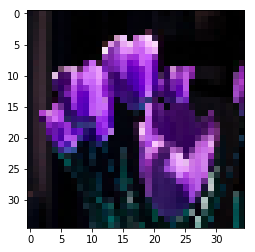

In [50]:
plt.imshow(img_tulip[0,:-1].reshape((pixel,pixel,3)))

In [51]:
m = len(daisy)+len(dandelion)+len(sunflower)+len(tulip)+len(rose)
n = pixel*pixel*3+1
img = np.zeros((m,n))

In [52]:
img[:len(daisy),:] = img_daisy

In [53]:
img[len(daisy):len(daisy)+len(dandelion),:] = img_dandelion

In [54]:
img[len(daisy)+len(dandelion):len(daisy)+len(dandelion)+len(rose),:] = img_rose

In [55]:
img[len(daisy)+len(dandelion)+len(rose):len(daisy)+len(dandelion)+len(rose)+len(sunflower),:] = img_sunflower

In [56]:
img[len(daisy)+len(dandelion)+len(rose)+len(sunflower):,:] = img_tulip

In [57]:
np.random.shuffle(img)

In [58]:
X = img[:,:-1]

In [59]:
Y = img[:,-1]
Y = np.reshape(Y,(Y.shape[0],1))

In [60]:
X.shape

(4323, 3675)

In [61]:
Y.shape

(4323, 1)

In [62]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(750,activation="relu"))
model.add(keras.layers.Dense(5,activation="softmax"))

In [63]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [64]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=101)

In [66]:
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_val,y_val))

Train on 2593 samples, validate on 865 samples
Epoch 1/300
2593/2593 [==============================] - 1s 565us/sample - loss: 1.4659 - accuracy: 0.3494 - val_loss: 1.8790 - val_accuracy: 0.2647
Epoch 2/300
2593/2593 [==============================] - 1s 509us/sample - loss: 1.3118 - accuracy: 0.4435 - val_loss: 1.9027 - val_accuracy: 0.3006
Epoch 3/300
2593/2593 [==============================] - 1s 509us/sample - loss: 1.2547 - accuracy: 0.4763 - val_loss: 1.5871 - val_accuracy: 0.3468
Epoch 4/300
2593/2593 [==============================] - 1s 510us/sample - loss: 1.1830 - accuracy: 0.5179 - val_loss: 1.5881 - val_accuracy: 0.3514
Epoch 5/300
2593/2593 [==============================] - 1s 513us/sample - loss: 1.1532 - accuracy: 0.5349 - val_loss: 3.2016 - val_accuracy: 0.1884
Epoch 6/300
2593/2593 [==============================] - 1s 520us/sample - loss: 1.1568 - accuracy: 0.5453 - val_loss: 3.3315 - val_accuracy: 0.2139
Epoch 7/300
2593/2593 [==============================] - 1s

2593/2593 [==============================] - 2s 591us/sample - loss: 0.1839 - accuracy: 0.9637 - val_loss: 1.8579 - val_accuracy: 0.4532
Epoch 56/300
2593/2593 [==============================] - 1s 552us/sample - loss: 0.1655 - accuracy: 0.9626 - val_loss: 1.6040 - val_accuracy: 0.4925
Epoch 57/300
2593/2593 [==============================] - 1s 559us/sample - loss: 0.1494 - accuracy: 0.9695 - val_loss: 1.8215 - val_accuracy: 0.4636
Epoch 58/300
2593/2593 [==============================] - 1s 554us/sample - loss: 0.1115 - accuracy: 0.9830 - val_loss: 2.2949 - val_accuracy: 0.4000
Epoch 59/300
2593/2593 [==============================] - 2s 735us/sample - loss: 0.1621 - accuracy: 0.9668 - val_loss: 2.7927 - val_accuracy: 0.4220
Epoch 60/300
2593/2593 [==============================] - 2s 726us/sample - loss: 0.1295 - accuracy: 0.9796 - val_loss: 2.1373 - val_accuracy: 0.4671
Epoch 61/300
2593/2593 [==============================] - 1s 543us/sample - loss: 0.1348 - accuracy: 0.9742 - val

2593/2593 [==============================] - 1s 531us/sample - loss: 0.0164 - accuracy: 0.9973 - val_loss: 2.1056 - val_accuracy: 0.4902
Epoch 110/300
2593/2593 [==============================] - 1s 520us/sample - loss: 0.0142 - accuracy: 0.9977 - val_loss: 2.0979 - val_accuracy: 0.4832
Epoch 111/300
2593/2593 [==============================] - 1s 515us/sample - loss: 0.0167 - accuracy: 0.9969 - val_loss: 2.0786 - val_accuracy: 0.4855
Epoch 112/300
2593/2593 [==============================] - 1s 517us/sample - loss: 0.0144 - accuracy: 0.9981 - val_loss: 2.1348 - val_accuracy: 0.4832
Epoch 113/300
2593/2593 [==============================] - 1s 514us/sample - loss: 0.0160 - accuracy: 0.9973 - val_loss: 2.1241 - val_accuracy: 0.4832
Epoch 114/300
2593/2593 [==============================] - 1s 520us/sample - loss: 0.0134 - accuracy: 0.9981 - val_loss: 2.1366 - val_accuracy: 0.4890
Epoch 115/300
2593/2593 [==============================] - 1s 519us/sample - loss: 0.0141 - accuracy: 0.9977

2593/2593 [==============================] - 1s 518us/sample - loss: 0.0099 - accuracy: 0.9977 - val_loss: 2.2674 - val_accuracy: 0.5006
Epoch 164/300
2593/2593 [==============================] - 1s 519us/sample - loss: 0.0105 - accuracy: 0.9977 - val_loss: 2.3123 - val_accuracy: 0.4879
Epoch 165/300
2593/2593 [==============================] - 1s 530us/sample - loss: 0.0108 - accuracy: 0.9981 - val_loss: 2.2732 - val_accuracy: 0.5075
Epoch 166/300
2593/2593 [==============================] - 1s 519us/sample - loss: 0.0079 - accuracy: 0.9985 - val_loss: 2.2889 - val_accuracy: 0.4971
Epoch 167/300
2593/2593 [==============================] - 1s 515us/sample - loss: 0.0121 - accuracy: 0.9973 - val_loss: 2.2547 - val_accuracy: 0.4879
Epoch 168/300
2593/2593 [==============================] - 1s 516us/sample - loss: 0.0091 - accuracy: 0.9981 - val_loss: 2.2954 - val_accuracy: 0.4890
Epoch 169/300
2593/2593 [==============================] - 1s 517us/sample - loss: 0.0081 - accuracy: 0.9981

2593/2593 [==============================] - 1s 519us/sample - loss: 0.0066 - accuracy: 0.9981 - val_loss: 2.5244 - val_accuracy: 0.4821
Epoch 218/300
2593/2593 [==============================] - 1s 518us/sample - loss: 0.0079 - accuracy: 0.9977 - val_loss: 2.4019 - val_accuracy: 0.5017
Epoch 219/300
2593/2593 [==============================] - 1s 522us/sample - loss: 0.0073 - accuracy: 0.9981 - val_loss: 2.4225 - val_accuracy: 0.4902
Epoch 220/300
2593/2593 [==============================] - 1s 526us/sample - loss: 0.0057 - accuracy: 0.9985 - val_loss: 2.4239 - val_accuracy: 0.4948
Epoch 221/300
2593/2593 [==============================] - 2s 643us/sample - loss: 0.0057 - accuracy: 0.9985 - val_loss: 2.5347 - val_accuracy: 0.4832
Epoch 222/300
2593/2593 [==============================] - 2s 608us/sample - loss: 0.0061 - accuracy: 0.9985 - val_loss: 2.4475 - val_accuracy: 0.4879
Epoch 223/300
2593/2593 [==============================] - 2s 602us/sample - loss: 0.0059 - accuracy: 0.9985

2593/2593 [==============================] - 1s 518us/sample - loss: 0.0048 - accuracy: 0.9985 - val_loss: 2.5039 - val_accuracy: 0.4913
Epoch 272/300
2593/2593 [==============================] - 1s 518us/sample - loss: 0.0059 - accuracy: 0.9981 - val_loss: 2.4947 - val_accuracy: 0.4994
Epoch 273/300
2593/2593 [==============================] - 1s 517us/sample - loss: 0.0063 - accuracy: 0.9981 - val_loss: 2.5572 - val_accuracy: 0.4798
Epoch 274/300
2593/2593 [==============================] - 1s 516us/sample - loss: 0.0064 - accuracy: 0.9981 - val_loss: 2.4954 - val_accuracy: 0.4913
Epoch 275/300
2593/2593 [==============================] - 1s 537us/sample - loss: 0.0054 - accuracy: 0.9981 - val_loss: 2.5645 - val_accuracy: 0.4786
Epoch 276/300
2593/2593 [==============================] - 1s 517us/sample - loss: 0.0062 - accuracy: 0.9977 - val_loss: 2.5173 - val_accuracy: 0.4890
Epoch 277/300
2593/2593 [==============================] - 1s 518us/sample - loss: 0.0068 - accuracy: 0.9981

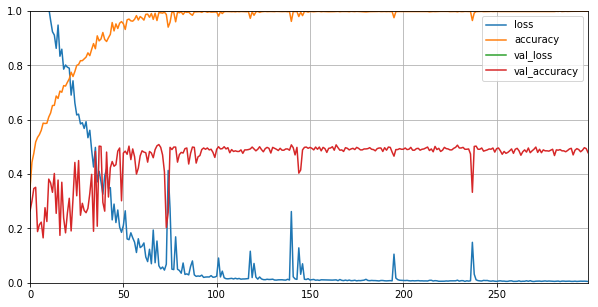

In [67]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

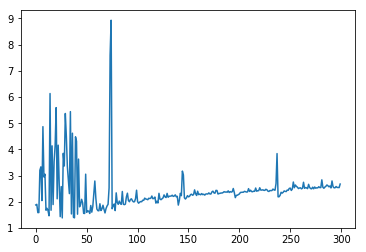

In [68]:
plt.plot(history.history['val_loss'])

In [69]:
y_pred = model.predict_classes(X_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.42      0.44      0.43       153
         1.0       0.48      0.63      0.54       197
         2.0       0.41      0.50      0.45       159
         3.0       0.67      0.63      0.65       146
         4.0       0.60      0.32      0.42       210

   micro avg       0.50      0.50      0.50       865
   macro avg       0.51      0.50      0.50       865
weighted avg       0.52      0.50      0.49       865



In [71]:
print(confusion_matrix(y_test,y_pred))

[[ 67  55  19   6   6]
 [ 33 125  21  16   2]
 [ 26  21  79   3  30]
 [ 15  22  10  92   7]
 [ 20  39  64  20  67]]


In [79]:
model.evaluate(X_test,y_test)

865/865 [==============================] - 0s 217us/sample - loss: 2.4822 - accuracy: 0.4971


[2.4821590352092864, 0.49710983]